# Denoising filter testing
## required libaries

In [1]:
import os, time, cv2
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from scipy.ndimage import median_filter
from skimage.draw import line as skidline
import functions as f

home_dir = os.path.abspath("")

## load file

In [2]:
#filepath_noisy = filedialog.askopenfilename(title='Please select the image',filetypes=[("Tiff images", "*.tif;*.tiff")])
tiff_file  = home_dir + os.sep + '84d tiff.tif'
CT = f.CTPreprocessor(tiff_file)

Dimensions: z = 1510, h = 1905, w = 1908 [px]


## Show the loaded images

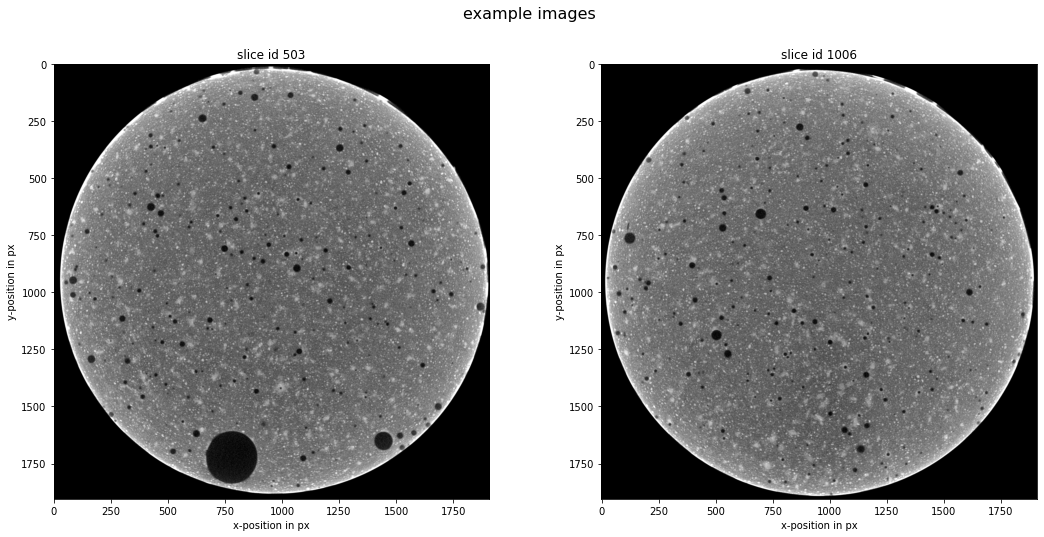

In [3]:
CT.show_example_slices()

## process the main circle, its center point and the inner pores

In [15]:
circle_radii   = np.empty((CT.z,) , dtype = np.int16 )
circle_centers = np.empty((CT.z,2), dtype = np.int32 )
pore_areas	   = np.empty((CT.z,) , dtype = np.float64 )

for i in range( CT.z ):
	if i%100 == 0: print("slice{: 5d} of{: 5d}".format(i, CT.z))
	CT.select_slice(i)

	CT.identify_main_circle(verbose=False)
	CT.get_main_circle()
	CT.identify_pores()
	
	circle_radii[i]   = CT.min_length    # not really r
	circle_centers[i] = CT.center
	pore_areas[i]     = CT.pore_area_percent*100


slice    0 of 1510
slice  100 of 1510
slice  200 of 1510
slice  300 of 1510
slice  400 of 1510
slice  500 of 1510
slice  600 of 1510
slice  700 of 1510
slice  800 of 1510
slice  900 of 1510
slice 1000 of 1510
slice 1100 of 1510
slice 1200 of 1510
slice 1300 of 1510
slice 1400 of 1510
slice 1500 of 1510


In [16]:
print(circle_centers.shape)
print(circle_radii.shape)

(1510, 2)
(1510,)


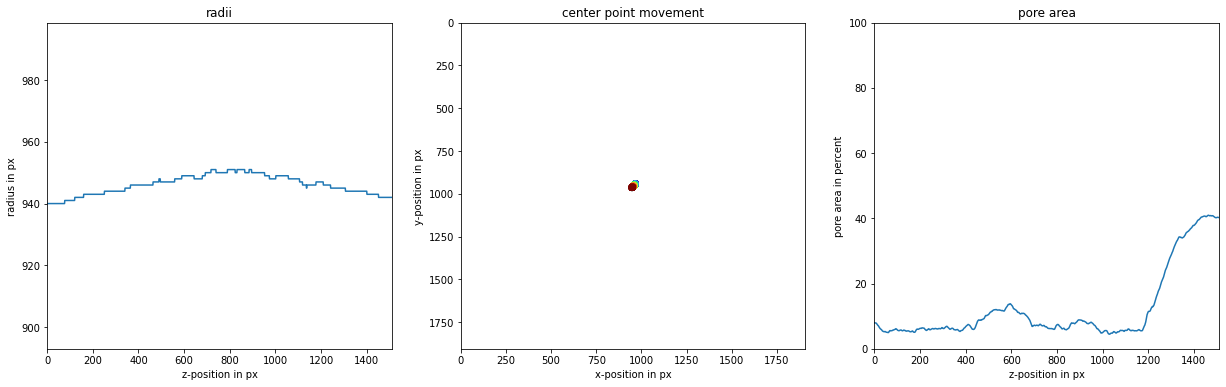

In [17]:
fig, ax = plt.subplots(1,3, figsize=(21,6))

ax[0].plot( range(CT.z), circle_radii )
ax[0].set_xlim((0, CT.z))
ax[0].set_ylim((circle_radii.min()*0.95, circle_radii.max()*1.05))
ax[0].set_title( "radii" )
ax[0].set_xlabel("z-position in {}".format(CT.unit))
ax[0].set_ylabel("radius in {}".format(CT.unit))

ax[1].scatter(*zip(*circle_centers), c=range(CT.z), cmap='turbo')
ax[1].set_xlim((0, CT.w))
ax[1].set_ylim((CT.h, 0))
ax[1].set_title( "center point movement" )
ax[1].set_xlabel("x-position in {}".format(CT.unit))
ax[1].set_ylabel("y-position in {}".format(CT.unit))

ax[2].plot( range(CT.z), pore_areas )
ax[2].set_title( "pore area" )
ax[2].set_xlim((0, CT.z))
ax[2].set_ylim((0, 100))
ax[2].set_xlabel("z-position in {}".format(CT.unit))
ax[2].set_ylabel("pore area in percent")

plt.show()